<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_2_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.284831,83.059367,46.850883,0.001381,187.196463,187.194791,0.001672
1,0.0,1.0,83.175138,91.277337,40.409937,0.000093,224.862505,224.863242,-0.000737
2,0.0,2.0,53.338960,50.114039,41.137780,-0.006571,154.584208,154.590405,-0.006197
3,0.0,3.0,74.348607,40.643634,68.971991,0.000839,193.965072,193.963239,0.001833
4,0.0,4.0,24.524915,51.224134,57.115746,-0.004991,142.859804,142.863243,-0.003439
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,56.271083,99.374941,75.191579,0.001233,240.838836,240.838538,0.000298
59996,999.0,56.0,54.609018,58.044535,82.896147,-0.001805,205.547895,205.549438,-0.001543
59997,999.0,57.0,77.338298,20.854226,49.834667,-0.006397,158.020795,158.026055,-0.005260
59998,999.0,58.0,26.375986,61.630472,84.149186,-0.000392,182.155252,182.154866,0.000386


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.284831  83.059367  46.850883  0.001381  187.196463   
      1.0    83.175138  91.277337  40.409937  0.000093  224.862505   
      2.0    53.338960  50.114039  41.137780 -0.006571  154.584208   
      3.0    74.348607  40.643634  68.971991  0.000839  193.965072   
      4.0    24.524915  51.224134  57.115746 -0.004991  142.859804   
...                ...        ...        ...       ...         ...   
999.0 55.0   56.271083  99.374941  75.191579  0.001233  240.838836   
      56.0   54.609018  58.044535  82.896147 -0.001805  205.547895   
      57.0   77.338298  20.854226  49.834667 -0.006397  158.020795   
      58.0   26.375986  61.630472  84.149186 -0.000392  182.155252   
      59.0   72.634466  71.786693  38.089791  0.002991  192.513941   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    187.194791  0.001672  
      1.0    224.863242 -0.000737  
      2.0    154.590405 -0.006197  
      3.0    193.963239  0.001833  
      4.0    142.863243 -0.003439  
...                 ...       ...  
999.0 55.0   240.838538  0.000298  
      56.0   205.549438 -0.001543  
      57.0   158.026055 -0.005260  
      58.0   182.154866  0.000386  
      59.0   192.511119  0.002822  

[60000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.284831  83.059367  46.850883  0.001381  187.196463   
      1.0    83.175138  91.277337  40.409937  0.000093  224.862505   
      2.0    53.338960  50.114039  41.137780 -0.006571  154.584208   
      3.0    74.348607  40.643634  68.971991  0.000839  193.965072   
      4.0    24.524915  51.224134  57.115746 -0.004991  142.859804   
...                ...        ...        ...       ...         ...   
999.0 55.0   56.271083  99.374941  75.191579  0.001233  240.838836   
      56.0   54.609018  58.044535  82.896147 -0.001805  205.547895   
      57.0   77.338298  20.854226  49.834667 -0.006397  158.020795   
      58.0   26.375986  61.630472  84.149186 -0.000392  182.155252   
      59.0   72.634466  71.786693  38.089791  0.002991  192.513941   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    187.194791  0.001672  
      1.0    224.863242 -0.000737  
      2.0    154.590405 -0.006197  
      3.0    193.963239  0.001833  
      4.0    142.863243 -0.003439  
...                 ...       ...  
999.0 55.0   240.838538  0.000298  
      56.0   205.549438 -0.001543  
      57.0   158.026055 -0.005260  
      58.0   182.154866  0.000386  
      59.0   192.511119  0.002822  

[60000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,47.284831,83.059367,46.850883,0.001381,187.196463,187.194791,0.001672
1,0.0,1.0,83.175138,91.277337,40.409937,0.000093,224.862505,224.863242,-0.000737
2,0.0,2.0,53.338960,50.114039,41.137780,-0.006571,154.584208,154.590405,-0.006197
3,0.0,3.0,74.348607,40.643634,68.971991,0.000839,193.965072,193.963239,0.001833
4,0.0,4.0,24.524915,51.224134,57.115746,-0.004991,142.859804,142.863243,-0.003439
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,56.271083,99.374941,75.191579,0.001233,240.838836,240.838538,0.000298
59996,999.0,56.0,54.609018,58.044535,82.896147,-0.001805,205.547895,205.549438,-0.001543
59997,999.0,57.0,77.338298,20.854226,49.834667,-0.006397,158.020795,158.026055,-0.005260
59998,999.0,58.0,26.375986,61.630472,84.149186,-0.000392,182.155252,182.154866,0.000386


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    47.284831  83.059367  46.850883  0.001381  187.196463   
      1.0    83.175138  91.277337  40.409937  0.000093  224.862505   
      2.0    53.338960  50.114039  41.137780 -0.006571  154.584208   
      3.0    74.348607  40.643634  68.971991  0.000839  193.965072   
      4.0    24.524915  51.224134  57.115746 -0.004991  142.859804   
...                ...        ...        ...       ...         ...   
999.0 55.0   56.271083  99.374941  75.191579  0.001233  240.838836   
      56.0   54.609018  58.044535  82.896147 -0.001805  205.547895   
      57.0   77.338298  20.854226  49.834667 -0.006397  158.020795   
      58.0   26.375986  61.630472  84.149186 -0.000392  182.155252   
      59.0   72.634466  71.786693  38.089791  0.002991  192.513941   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    187.194791  0.001672  
      1.0    224.863242 -0.000737  
      2.0    154.590405 -0.006197  
      3.0    193.963239  0.001833  
      4.0    142.863243 -0.003439  
...                 ...       ...  
999.0 55.0   240.838538  0.000298  
      56.0   205.549438 -0.001543  
      57.0   158.026055 -0.005260  
      58.0   182.154866  0.000386  
      59.0   192.511119  0.002822  

[60000 rows x 7 columns]

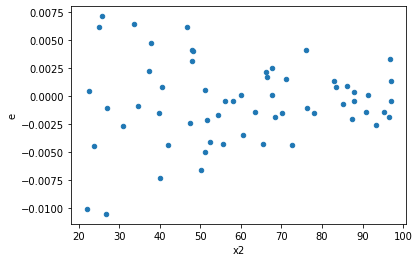

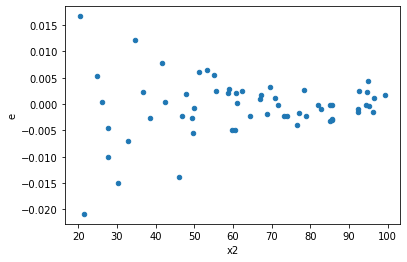

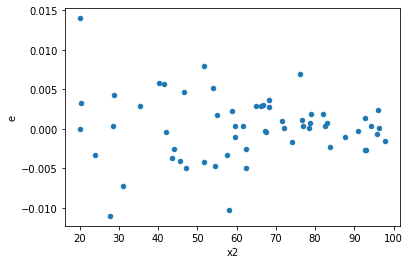

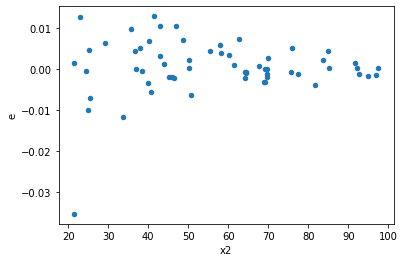

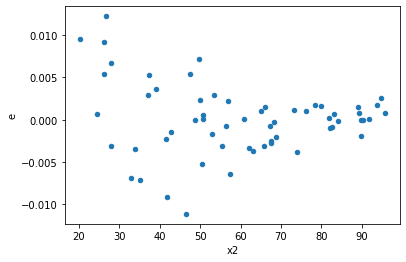

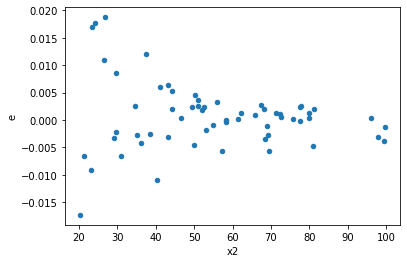

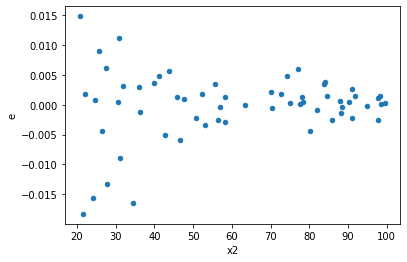

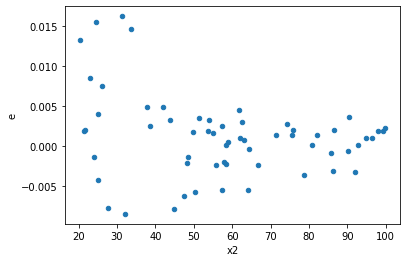

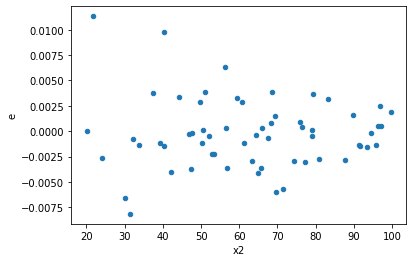

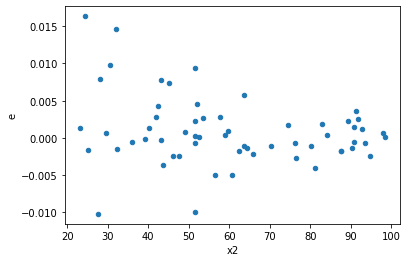

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,25.0,29.0,0.0003739234173710574,0.00046835848648800336,1.4956936694842295e-05,1.6150292637517357e-05,1.0797861197798995,0.8361707574765251,0.5819146212617374,0.41808537873826257,Reject001=1 : Homoscedasticity
3.0,27.0,27.0,0.00045868967204054217,0.0021328570513030757,1.698850637187193e-05,7.899470560381761e-05,4.649891160214654,0.0001535464348159099,0.999923226782592,7.677321740795495e-05,Reject001=0 : Heteroscedasticity
4.0,30.0,24.0,0.000278851271868452,0.0006880698065871442,9.295042395615068e-06,2.8669575274464342e-05,3.08439424525801,0.00607580846507072,0.9969620957674646,0.00303790423253536,Reject001=0 : Heteroscedasticity
7.0,24.0,30.0,0.00015676031234449956,0.0011578919002706615,6.531679681020815e-06,3.859639667568872e-05,5.909107390529079,9.324238851027289e-06,0.9999953378805745,4.6621194255136444e-06,Reject001=0 : Heteroscedasticity
8.0,23.0,31.0,0.00019841217983136017,0.0003536297152614331,8.626616514406963e-06,1.1407410169723648e-05,1.3223504430355277,0.4627420521498835,0.7686289739250582,0.23137102607494175,Reject001=1 : Homoscedasticity
9.0,24.0,30.0,0.00043827540728027853,0.0005473642805864149,1.8261475303344938e-05,1.8245476019547163e-05,0.9991238778065843,0.9902829705585907,0.5048585147207046,0.49514148527929536,Reject001=1 : Homoscedasticity
10.0,19.0,35.0,9.791647199248648e-05,0.0012379871603391548,5.153498525920341e-06,3.537106172397585e-05,6.863504771772315,1.069177576695779e-06,0.9999994654112117,5.345887883478895e-07,Reject001=0 : Heteroscedasticity
12.0,27.0,27.0,0.0010268077500543852,0.0014664594334212102,3.8029916668680935e-05,5.431331234893371e-05,1.428173320023674,0.36017864249848186,0.8199106787507591,0.18008932124924093,Reject001=1 : Homoscedasticity
15.0,23.0,31.0,0.0001134674124456077,0.0013810595754744697,4.933365758504682e-06,4.455030888627322e-05,9.030408663592896,6.076671343890894e-08,0.9999999696166433,3.038335671945447e-08,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,25.0,29.0,0.000489021651410969,0.0002076363714290025,1.956086605643876e-05,7.159874876862155e-06,0.3660305661417978,0.012757577687088024,Reject001=1 : Homoscedasticity
1.0,25.0,29.0,0.0015794949751337466,0.00014817041171284203,6.317979900534987e-05,5.109324541822139e-06,0.08086959158242174,1.3235003327258487e-08,Reject001=0 : Heteroscedasticity
2.0,25.0,29.0,0.0003739234173710574,0.00046835848648800336,1.4956936694842295e-05,1.6150292637517357e-05,1.0797861197798995,0.8361707574765251,Reject001=1 : Homoscedasticity
3.0,27.0,27.0,0.00045868967204054217,0.0021328570513030757,1.698850637187193e-05,7.899470560381761e-05,4.649891160214654,0.0001535464348159099,Reject001=0 : Heteroscedasticity
4.0,30.0,24.0,0.000278851271868452,0.0006880698065871442,9.295042395615068e-06,2.8669575274464342e-05,3.08439424525801,0.00607580846507072,Reject001=0 : Heteroscedasticity
5.0,29.0,25.0,0.001676403984778794,0.0004736922095186036,5.780703395788945e-05,1.8947688380744144e-05,0.327774789388899,0.004500877536295232,Reject001=0 : Heteroscedasticity
6.0,30.0,24.0,0.001132225423867565,0.0005284011317022655,3.774084746225216e-05,2.2016713820927728e-05,0.5833656449540122,0.16194161172603921,Reject001=1 : Homoscedasticity
7.0,24.0,30.0,0.00015676031234449956,0.0011578919002706615,6.531679681020815e-06,3.859639667568872e-05,5.909107390529079,9.324238851027289e-06,Reject001=0 : Heteroscedasticity
8.0,23.0,31.0,0.00019841217983136017,0.0003536297152614331,8.626616514406963e-06,1.1407410169723648e-05,1.3223504430355277,0.4627420521498835,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    534
Reject001=1 : Homoscedasticity      466
Name: Result_test, dtype: int64